<a href="https://colab.research.google.com/github/Jaslyn10/Mental_Health_Analysis_using_SVM/blob/main/svm_logistic_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/SML_Autumn_Project/Mental Health Dataset.csv")
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [ ]:
df = df.drop(columns=['Timestamp'])
df.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [ ]:
df.isnull().any()

,0
Gender,False
Country,False
Occupation,False
self_employed,True
family_history,False
treatment,False
Days_Indoors,False
Growing_Stress,False
Changes_Habits,False
Mental_Health_History,False


In [ ]:
df['self_employed'].isnull().sum()

np.int64(5202)

In [ ]:
df['self_employed'].count()

np.int64(287162)

In [ ]:
df.dropna(inplace=True)
df['self_employed'].isnull().sum()

np.int64(0)

In [ ]:
df.shape

(287162, 16)

In [ ]:
for col in df.columns:
    print(f'Column: {col}')
    print(df[col].unique())
    print(df[col].nunique())
    print(df[col].value_counts())
    print('\n')

Column: Gender
['Female' 'Male']
2
Gender
Male      235950
Female     51212
Name: count, dtype: int64


Column: Country
['United States' 'Poland' 'Australia' 'Canada' 'United Kingdom'
 'South Africa' 'Sweden' 'New Zealand' 'Netherlands' 'India' 'Belgium'
 'Ireland' 'France' 'Portugal' 'Brazil' 'Costa Rica' 'Russia' 'Germany'
 'Switzerland' 'Finland' 'Israel' 'Italy' 'Bosnia and Herzegovina'
 'Singapore' 'Nigeria' 'Croatia' 'Thailand' 'Denmark' 'Mexico' 'Greece'
 'Moldova' 'Colombia' 'Georgia' 'Czech Republic' 'Philippines']
35
Country
United States             168056
United Kingdom             50624
Canada                     17556
Australia                   6026
Netherlands                 5894
Ireland                     5548
Germany                     4680
Sweden                      2818
India                       2774
France                      2340
Brazil                      2340
New Zealand                 1994
South Africa                1994
Italy                       15

In [ ]:
y = df['treatment']
X = df.drop(columns =['treatment'])
print(y)
X.head()

3         Yes
4         Yes
5         Yes
6         Yes
7          No
         ... 
292359    Yes
292360    Yes
292361     No
292362    Yes
292363    Yes
Name: treatment, Length: 287162, dtype: object


,Gender,Country,Occupation,self_employed,family_history,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,Female,United States,Corporate,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,Female,United States,Corporate,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,Female,Poland,Corporate,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,Female,Australia,Corporate,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,Female,United States,Corporate,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


In [ ]:
y = df['treatment'].map({"Yes": 1, "No": 0})
print(y)
print(y.value_counts())

3         1
4         1
5         1
6         1
7         0
         ..
292359    1
292360    1
292361    0
292362    1
292363    1
Name: treatment, Length: 287162, dtype: int64
treatment
1    144744
0    142418
Name: count, dtype: int64


In [ ]:
binary_cols = ["Gender", "self_employed", "family_history", "Coping_Struggles"]
ordinal_cols = ["Mood_Swings", "Days_Indoors"]
mood_order = ["Low", "Medium", "High"]
days_order = [
    "Go out Every day",
    "1-14 days",
    "15-30 days",
    "31-60 days",
    "More than 2 months"
]
nominal_onehot_cols = ["Country",
    "Occupation",
    "Growing_Stress",
    "Changes_Habits",
    "Mental_Health_History",
    "Work_Interest",
    "Social_Weakness",
    "mental_health_interview",
    "care_options"
]
#country_col = ["Country"]

In [ ]:
#For binary columns
def map_binary(df_sub):
    df_sub = df_sub.copy()
    if "Gender" in df_sub.columns:
        df_sub["Gender"] = df_sub["Gender"].map({"Male": 0, "Female": 1})
    for c in ["self_employed", "family_history", "Coping_Struggles"]:
        if c in df_sub.columns:
            df_sub[c] = df_sub[c].map({"Yes": 1, "No": 0})
    return df_sub

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer

binary_mapper = Pipeline(steps=[
    ("binary_map", FunctionTransformer(map_binary, validate=False))
])

ordinal_categories = [mood_order, days_order]
ordinal_transformer = Pipeline(steps=[
    ("ord", OrdinalEncoder(categories=ordinal_categories, dtype=int))
])

onehot_transformer = Pipeline(steps=[
    ("ohe", OneHotEncoder(sparse_output=False))
])

"""def freq_encode_country(df_sub):
    s = df_sub["Country"]
    freq = s.value_counts()
    return s.map(freq).to_frame()

country_freq_transformer = Pipeline(steps=[
    ("freq", FunctionTransformer(freq_encode_country, validate=False))
])
"""

'def freq_encode_country(df_sub):\n    s = df_sub["Country"]\n    freq = s.value_counts()\n    return s.map(freq).to_frame()\n\ncountry_freq_transformer = Pipeline(steps=[\n    ("freq", FunctionTransformer(freq_encode_country, validate=False))\n])\n'

In [ ]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ("binary", binary_mapper, binary_cols),
    ("ordinal", ordinal_transformer, ordinal_cols),
    ("onehot", onehot_transformer, nominal_onehot_cols)
], remainder="drop", sparse_threshold=0) #("country", country_freq_transformer, country_col)

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import StandardScaler
pipeline_prep = Pipeline([
    ("preprocess", preprocessor),
    ("scaler", StandardScaler())
])
X_processed = pipeline_prep.fit_transform(X)
k = 5000
kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=5000)
kmeans.fit(X_processed)


MiniBatchKMeans(batch_size=5000, n_clusters=5000, random_state=42)

In [ ]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X_processed)

X_small = X.iloc[closest].copy()
y_small = y.iloc[closest].copy()

print("Reduced dataset shape:", X_small.shape)
print(y_small.value_counts())

Reduced dataset shape: (5000, 15)
treatment
1    2505
0    2495
Name: count, dtype: int64


In [ ]:
X_small.head()

,Gender,Country,Occupation,self_employed,family_history,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
163228,Male,United Kingdom,Others,No,No,31-60 days,No,No,No,Medium,Yes,No,Yes,No,No
287458,Male,United Kingdom,Student,No,No,31-60 days,Maybe,Yes,Maybe,High,Yes,Yes,Maybe,No,No
17192,Female,United States,Corporate,No,Yes,More than 2 months,Yes,No,Maybe,Medium,No,Maybe,Yes,No,Not sure
53757,Male,United States,Housewife,No,No,More than 2 months,No,Yes,Yes,Medium,No,Maybe,Maybe,No,No
127576,Male,United States,Corporate,No,Yes,1-14 days,No,Yes,No,Medium,Yes,No,Maybe,No,No


In [ ]:
for col in X_small.columns:
    print(f'Column: {col}')
    print(X_small[col].unique())
    print(X_small[col].nunique())
    print(X_small[col].value_counts())
    print('\n')

Column: Gender
['Male' 'Female']
2
Gender
Male      4035
Female     965
Name: count, dtype: int64


Column: Country
['United Kingdom' 'United States' 'Philippines' 'Switzerland'
 'Netherlands' 'Georgia' 'Brazil' 'South Africa' 'Moldova' 'India'
 'New Zealand' 'Russia' 'Ireland' 'Germany' 'Australia' 'Canada' 'Sweden'
 'Italy' 'Israel' 'Greece' 'France' 'Nigeria' 'Bosnia and Herzegovina'
 'Denmark' 'Poland' 'Singapore' 'Costa Rica' 'Belgium' 'Croatia'
 'Thailand' 'Portugal' 'Mexico' 'Colombia' 'Czech Republic' 'Finland']
35
Country
United States             2603
United Kingdom             992
Canada                     391
Australia                  126
Netherlands                105
Ireland                    101
Germany                     97
India                       66
Sweden                      56
France                      45
Brazil                      44
Italy                       41
Israel                      36
South Africa                33
New Zealand                 3

In [ ]:
y_small[:10]

,treatment
163228,0
287458,0
17192,0
53757,1
127576,1
147246,0
179797,0
92502,1
248859,1
291654,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(
    X_small, y_small,
    test_size=0.2,
    random_state=42,
    stratify=y_small
)


In [ ]:
#Linear_SVM
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
lin_svm = Pipeline([
    ("preproc", preprocessor),
    ("scaler", StandardScaler()),
    ("l_svm", LinearSVC(C=0.01, loss="hinge", max_iter=1000))
])
lin_svm.fit(X_train_small, y_train_small)

Pipeline(steps=[('preproc',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('binary',
                                                  Pipeline(steps=[('binary_map',
                                                                   FunctionTransformer(func=<function map_binary at 0x7fc39abefe20>))]),
                                                  ['Gender', 'self_employed',
                                                   'family_history',
                                                   'Coping_Struggles']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Go '
                                                                                               'out '
                                                                                               'Every '...
                                                                                  dtype=<class 'int'>))]),
                                                  ['Mood_Swings',
                                                   'Days_Indoors']),
                                                 ('onehot',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Country', 'Occupation',
                                                   'Growing_Stress',
                                                   'Changes_Habits',
                                                   'Mental_Health_History',
                                                   'Work_Interest',
                                                   'Social_Weakness',
                                                   'mental_health_interview',
                                                   'care_options'])])),
                ('scaler', StandardScaler()),
                ('l_svm', LinearSVC(C=0.01, loss='hinge'))])

In [ ]:
y_pred_l_small = lin_svm.predict(X_test_small)
print("Accuracy:", accuracy_score(y_test_small, y_pred_l_small))
print(classification_report(y_test_small, y_pred_l_small))

Accuracy: 0.825
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       499
           1       0.82      0.84      0.83       501

    accuracy                           0.82      1000
   macro avg       0.83      0.82      0.82      1000
weighted avg       0.83      0.82      0.82      1000



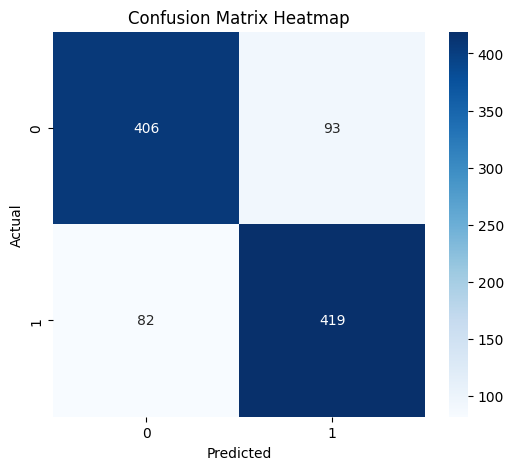

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test_small, y_pred_l_small)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
#Linear_SVM
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
lin_svm = Pipeline([
    ("preproc", preprocessor),
    ("scaler", StandardScaler()),
    ("l_svm", LinearSVC(dual=False, max_iter=1000,loss="squared_hinge",C=100))
    ])

In [ ]:
lin_svm.fit(X_train, y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('binary',
                                                  Pipeline(steps=[('binary_map',
                                                                   FunctionTransformer(func=<function map_binary at 0x7fc39abefe20>))]),
                                                  ['Gender', 'self_employed',
                                                   'family_history',
                                                   'Coping_Struggles']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Go '
                                                                                               'out '
                                                                                               'Every '...
                                                                                  dtype=<class 'int'>))]),
                                                  ['Mood_Swings',
                                                   'Days_Indoors']),
                                                 ('onehot',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Country', 'Occupation',
                                                   'Growing_Stress',
                                                   'Changes_Habits',
                                                   'Mental_Health_History',
                                                   'Work_Interest',
                                                   'Social_Weakness',
                                                   'mental_health_interview',
                                                   'care_options'])])),
                ('scaler', StandardScaler()),
                ('l_svm', LinearSVC(C=100, dual=False))])

In [ ]:
model = lin_svm.named_steps["l_svm"]
print(model.n_iter_)
print(model.max_iter)


5
1000


In [ ]:
y_pred_l = lin_svm.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_l))
print(classification_report(y_test, y_pred_l))

Accuracy: 0.7195688889662737
              precision    recall  f1-score   support

           0       0.72      0.70      0.71     28484
           1       0.71      0.74      0.73     28949

    accuracy                           0.72     57433
   macro avg       0.72      0.72      0.72     57433
weighted avg       0.72      0.72      0.72     57433



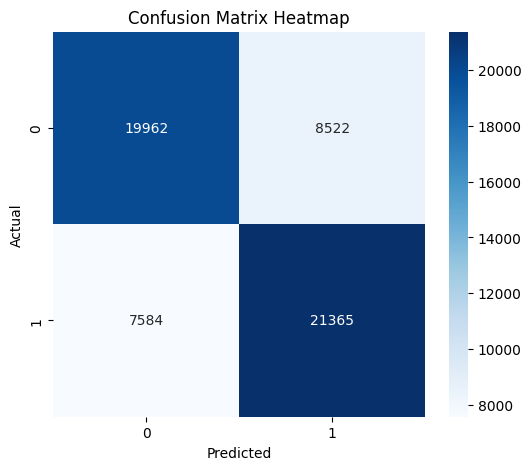

In [ ]:
cm = confusion_matrix(y_test, y_pred_l)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [ ]:
#applying PCA with LinearSVM
from sklearn.decomposition import PCA
pca_lin_svm = Pipeline([
    ("preproc", preprocessor),
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=8)),
    ("lin_svm", LinearSVC(dual=False, max_iter=1000))
])

In [ ]:
pca_lin_svm.fit(X_train,y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('binary',
                                                  Pipeline(steps=[('binary_map',
                                                                   FunctionTransformer(func=<function map_binary at 0x7fc39abefe20>))]),
                                                  ['Gender', 'self_employed',
                                                   'family_history',
                                                   'Coping_Struggles']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Go '
                                                                                               'out '
                                                                                               'Every '...
                                                  ['Mood_Swings',
                                                   'Days_Indoors']),
                                                 ('onehot',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Country', 'Occupation',
                                                   'Growing_Stress',
                                                   'Changes_Habits',
                                                   'Mental_Health_History',
                                                   'Work_Interest',
                                                   'Social_Weakness',
                                                   'mental_health_interview',
                                                   'care_options'])])),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=8)),
                ('lin_svm', LinearSVC(dual=False))])

In [ ]:
model = pca_lin_svm.named_steps["lin_svm"]
print(model.n_iter_)
print(model.max_iter)


3
1000


In [ ]:
y_pred_lin = pca_lin_svm.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_lin))
print(classification_report(y_test, y_pred_lin))

Accuracy: 0.6743683944770428
              precision    recall  f1-score   support

           0       0.66      0.72      0.69     28484
           1       0.70      0.63      0.66     28949

    accuracy                           0.67     57433
   macro avg       0.68      0.67      0.67     57433
weighted avg       0.68      0.67      0.67     57433



In [ ]:
'''from sklearn.svm import SVC
poly_svm = Pipeline([
    ("preproc", preprocessor),
    ("scaler", StandardScaler()),
    ("poly_svm", SVC(kernel="poly", degree=3, C=1.0, gamma="scale", coef0=1)) #takes too long to train
])'''

'from sklearn.svm import SVC\npoly_svm = Pipeline([\n    ("preproc", preprocessor),\n    ("scaler", StandardScaler()),\n    ("poly_svm", SVC(kernel="poly", degree=3, C=1.0, gamma="scale", coef0=1)) #takes too long to train\n])'

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_lin_svm = Pipeline([
    ("preproc", preprocessor),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler(with_mean=False)),
    ("svm", LinearSVC(dual=False, max_iter=1000,loss="squared_hinge",C=1))
])


In [ ]:
poly_lin_svm.fit(X_train,y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('binary',
                                                  Pipeline(steps=[('binary_map',
                                                                   FunctionTransformer(func=<function map_binary at 0x7fc39abefe20>))]),
                                                  ['Gender', 'self_employed',
                                                   'family_history',
                                                   'Coping_Struggles']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Go '
                                                                                               'out '
                                                                                               'Every '...
                                                 ('onehot',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Country', 'Occupation',
                                                   'Growing_Stress',
                                                   'Changes_Habits',
                                                   'Mental_Health_History',
                                                   'Work_Interest',
                                                   'Social_Weakness',
                                                   'mental_health_interview',
                                                   'care_options'])])),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler(with_mean=False)),
                ('svm', LinearSVC(C=1, dual=False))])

In [ ]:
model = poly_lin_svm.named_steps["svm"]
print(model.n_iter_)
print(model.max_iter)
y_pred_pls = poly_lin_svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_pls))
print(classification_report(y_test, y_pred_pls))

11
1000
Accuracy: 0.7544965437988613
              precision    recall  f1-score   support

           0       0.78      0.70      0.74     28484
           1       0.73      0.81      0.77     28949

    accuracy                           0.75     57433
   macro avg       0.76      0.75      0.75     57433
weighted avg       0.76      0.75      0.75     57433



In [ ]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline((
("preproc", preprocessor),
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=100, coef0=1, C=5))
))
poly_kernel_svm_clf.fit(X_train_small, y_train_small)

In [ ]:
model = poly_kernel_svm_clf.named_steps["svm_clf"]
print(model.n_iter_)
print(model.max_iter)
y_pred_pls = poly_kernel_svm_clf.predict(X_test_small)
print("Accuracy:", accuracy_score(y_test_small, y_pred_pls))
print(classification_report(y_test_small, y_pred_pls))

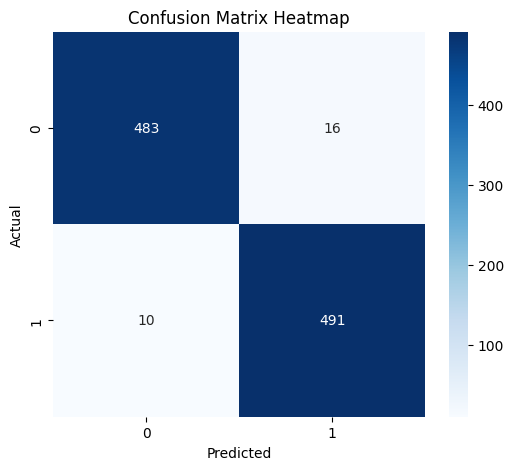

In [ ]:
cm = confusion_matrix(y_test_small, y_pred_pls)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [ ]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline((
("preproc", preprocessor),
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=2, coef0=100, C=5))
))
poly_kernel_svm_clf.fit(X_train_small, y_train_small)

Pipeline(steps=[('preproc',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('binary',
                                                  Pipeline(steps=[('binary_map',
                                                                   FunctionTransformer(func=<function map_binary at 0x7fc39abefe20>))]),
                                                  ['Gender', 'self_employed',
                                                   'family_history',
                                                   'Coping_Struggles']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Go '
                                                                                               'out '
                                                                                               'Every '...
                                                                                  dtype=<class 'int'>))]),
                                                  ['Mood_Swings',
                                                   'Days_Indoors']),
                                                 ('onehot',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Country', 'Occupation',
                                                   'Growing_Stress',
                                                   'Changes_Habits',
                                                   'Mental_Health_History',
                                                   'Work_Interest',
                                                   'Social_Weakness',
                                                   'mental_health_interview',
                                                   'care_options'])])),
                ('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=2, kernel='poly'))])

In [ ]:
model = poly_kernel_svm_clf.named_steps["svm_clf"]
print(model.n_iter_)
print(model.max_iter)
y_pred_pls = poly_kernel_svm_clf.predict(X_test_small)
print("Accuracy:", accuracy_score(y_test_small, y_pred_pls))
print(classification_report(y_test_small, y_pred_pls))

[28988314]
-1
Accuracy: 0.964
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       499
           1       0.95      0.97      0.96       501

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



In [ ]:
from sklearn.svm import SVC
rbf_kernel_svm_clf = Pipeline((
("preproc", preprocessor),
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="rbf", gamma=5, C=100))
))
rbf_kernel_svm_clf.fit(X_small, y_small)


Pipeline(steps=[('preproc',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('binary',
                                                  Pipeline(steps=[('binary_map',
                                                                   FunctionTransformer(func=<function map_binary at 0x7fc39abefe20>))]),
                                                  ['Gender', 'self_employed',
                                                   'family_history',
                                                   'Coping_Struggles']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Go '
                                                                                               'out '
                                                                                               'Every '...
                                                                                               'months']],
                                                                                  dtype=<class 'int'>))]),
                                                  ['Mood_Swings',
                                                   'Days_Indoors']),
                                                 ('onehot',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['Country', 'Occupation',
                                                   'Growing_Stress',
                                                   'Changes_Habits',
                                                   'Mental_Health_History',
                                                   'Work_Interest',
                                                   'Social_Weakness',
                                                   'mental_health_interview',
                                                   'care_options'])])),
                ('scaler', StandardScaler()),
                ('svm_clf', SVC(C=100, gamma=5))])

In [ ]:
model = rbf_kernel_svm_clf.named_steps["svm_clf"]
print(model.n_iter_)
print(model.max_iter)
y_pred_pls = rbf_kernel_svm_clf.predict(X_test_small)
print("Accuracy:", accuracy_score(y_test_small, y_pred_pls))
print(classification_report(y_test_small, y_pred_pls))

[7464]
-1
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       499
           1       1.00      1.00      1.00       501

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



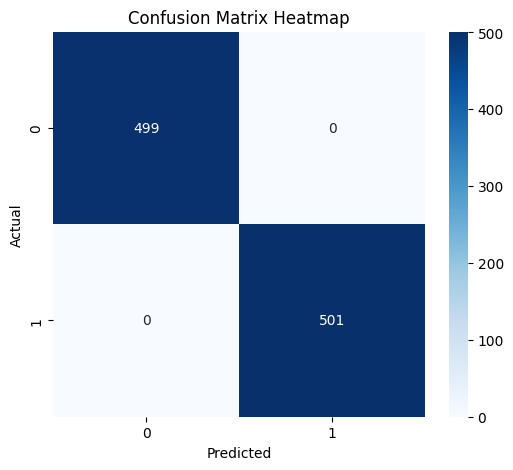

In [ ]:
cm = confusion_matrix(y_test_small, y_pred_pls)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

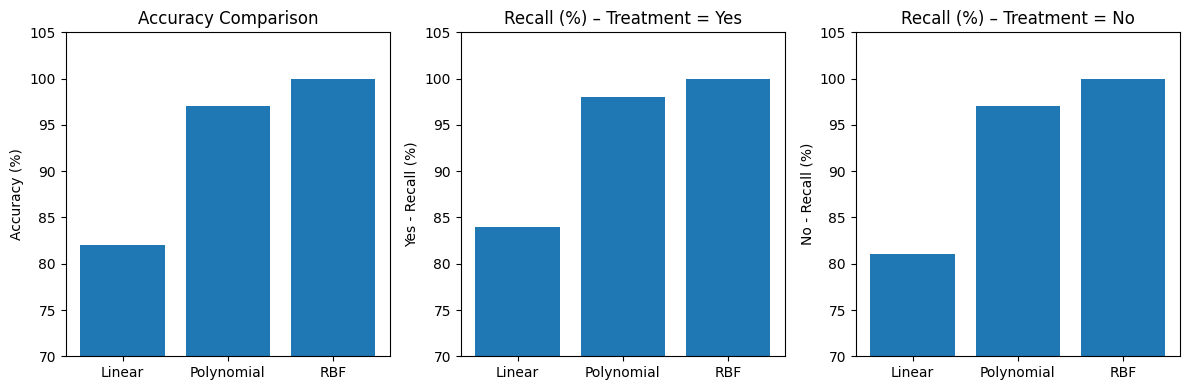

In [ ]:
import matplotlib.pyplot as plt

models = ['Linear', 'Polynomial', 'RBF']

accuracy = [82, 97, 100]
recall_yes = [84, 98, 100]
recall_no = [81, 97, 100]

plt.figure(figsize=(12, 4))


plt.subplot(1, 3, 1)
plt.bar(models, accuracy)
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.ylim(70, 105)


plt.subplot(1, 3, 2)
plt.bar(models, recall_yes)
plt.title("Recall (%) – Treatment = Yes")
plt.ylabel("Yes - Recall (%)")
plt.ylim(70, 105)


plt.subplot(1, 3, 3)
plt.bar(models, recall_no)
plt.title("Recall (%) – Treatment = No")
plt.ylabel("No - Recall (%)")
plt.ylim(70, 105)

plt.tight_layout()
plt.show()


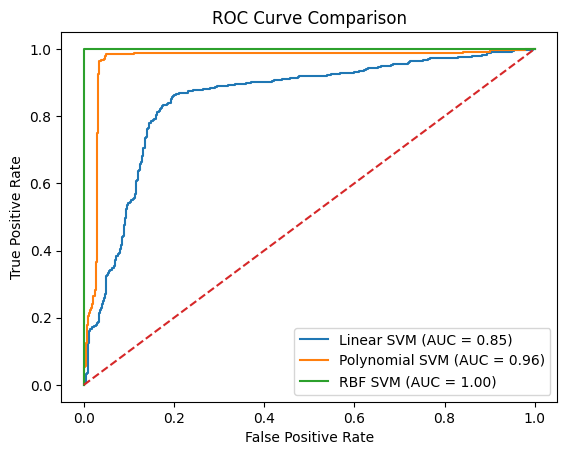

In [ ]:
from sklearn.metrics import roc_curve, auc


models = {
    'Linear SVM': lin_svm,
    'Polynomial SVM': poly_kernel_svm_clf,
    'RBF SVM': rbf_kernel_svm_clf
}

plt.figure()

for name, model in models.items():
    y_probs = model.decision_function(X_test_small)
    fpr, tpr, _ = roc_curve(y_test_small, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


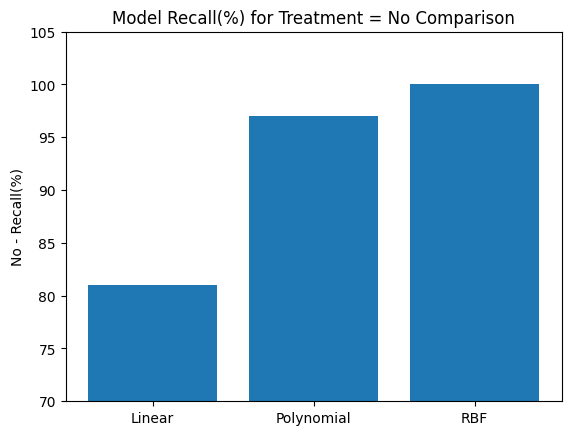

In [ ]:
models = ['Linear', 'Polynomial', 'RBF']
recall = [81, 97, 100]

plt.figure()
plt.bar(models, recall)
plt.title("Model Recall(%) for Treatment = No Comparison")
plt.ylabel("No - Recall(%)")
plt.ylim(70, 105)
plt.show()